<div style="background-color: #EFDDFF; ">
<h1> Variance, Covariance, Correlation, and PCA </h1>

<p> Let $\overline{x}$ denote the mean of the column $x$.  The __variance__ of a column is a quantity that captures the amount the values in that column vary:

$$var(x) = \frac{1}{n}\sum_{i=1}^n (x_i-\overline{x})^2$$

Given two columns of data (a statistician would call them _random vectors_), the __covariance__ of the pair is a quantity that captures the amount they _vary together_:

$$cov(x,y) = \frac{1}{n}\sum_{i=1}^n (x_i-\overline{x})(y_i-\overline{y})$$

Given a dataset, you could consider taking the covariance of every pair of columns, and somehow comparing them.  The most sensible thing to do for storing those covariances would be in a matrix, called the [__covariance matrix__](https://en.wikipedia.org/wiki/Covariance_matrix): 

$$\Sigma = \left(\begin{array}{cccc}
cov(x_1,x_1) & cov(x_1,x_2) & \dots & cov(x_1,x_n) \\
cov(x_2,x_1) & cov(x_2,x_2) & \dots & cov(x_2,x_n) \\
\vdots & \vdots & \ddots & \vdots \\
cov(x_n,x_1) & cov(x_n,x_2) & \dots & cov(x_n,x_n) \\
\end{array}\right)$$

Why should we care?  Let's see what happens with the covariance matrix of our dataset:
</div>

In [1]:
import io
import requests

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

%matplotlib inline

# This is the function from Jake's notebook
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

In [2]:
# for fun
def covariance(x,y):
    return np.mean((x-np.mean(x))*(y - np.mean(y)))

X = np.random.rand(4,10).T
x =np.array([[covariance(col_i,col_j) for col_i in X.T] for col_j in X.T])
x

array([[ 0.06858251, -0.00945042,  0.01184056, -0.02750984],
       [-0.00945042,  0.0651576 ,  0.03429767,  0.03307707],
       [ 0.01184056,  0.03429767,  0.06897721,  0.00768275],
       [-0.02750984,  0.03307707,  0.00768275,  0.03199038]])

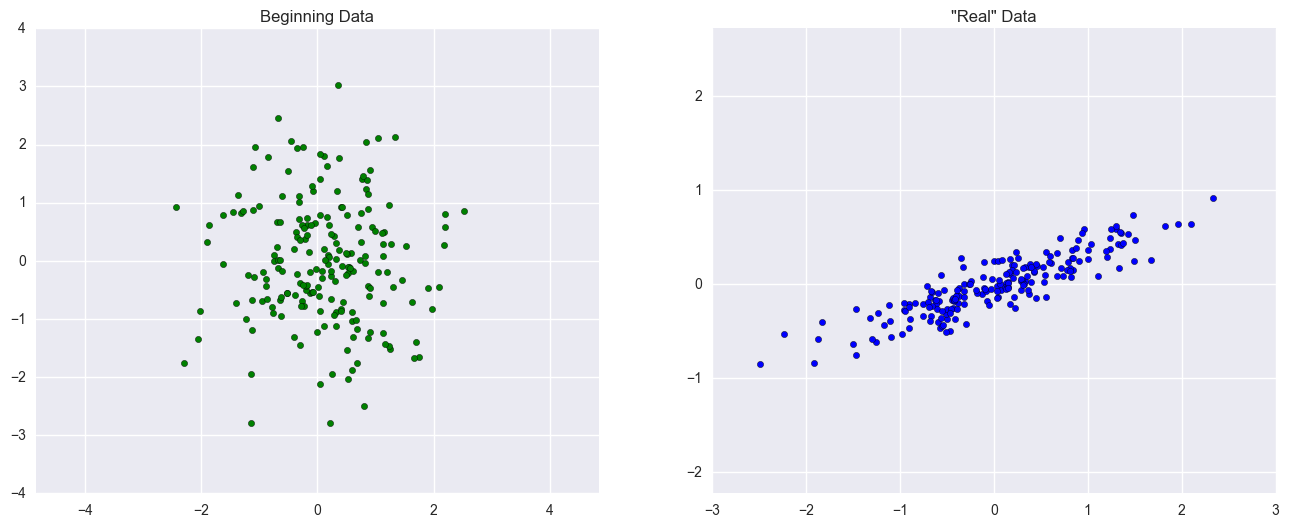

In [3]:
rng = np.random.RandomState(1)
mystery_2x2 = rng.rand(2, 2)
beginning_data = rng.randn(2, 200)

# Our "real" dataset:
X = np.dot(mystery_2x2, beginning_data).T

# Let's plot both the beginning dataset and the "real" dataset side-by-side
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].scatter(beginning_data.T[:, 0], beginning_data.T[:, 1], c='g')
ax[0].axis('equal')
ax[0].set(title="Beginning Data")

ax[1].scatter(X[:, 0], X[:, 1])
ax[1].axis('equal')
ax[1].set(title="\"Real\" Data");

In [178]:
pca = PCA(n_components=2)
pca.fit(X)

pca_white = PCA(n_components=2, whiten=True)
pca_white.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

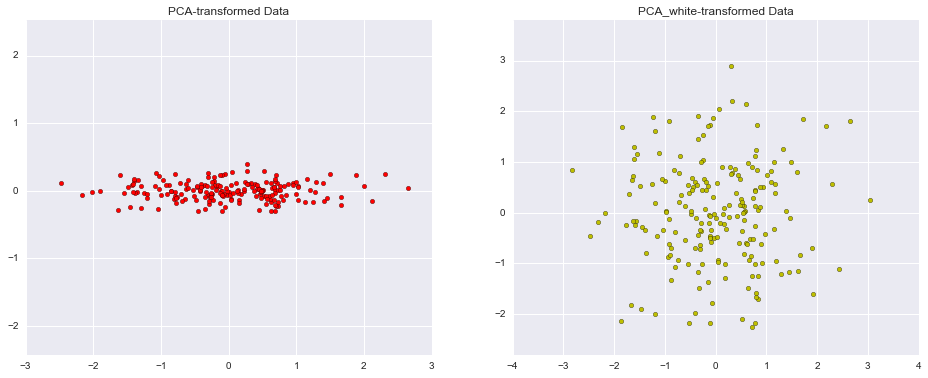

In [179]:
transformed = pca.transform(X)
transformed_white = pca_white.transform(X)

# What's the difference between the two?
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].scatter(transformed[:, 0], transformed[:, 1], c='r')
ax[0].axis('equal')
ax[0].set(title="PCA-transformed Data")

ax[1].scatter(transformed_white[:, 0], transformed_white[:, 1], c='y')
ax[1].axis('equal')
ax[1].set(title="PCA_white-transformed Data");

Let's now try something else.  The covariance matrix should somehow be related to all this, because with PCA we're looking for the "Axis of Maximal Variance".  Let's see what happens when we take our original dataset and hit it with the covariance matrix.

In [180]:
# Y = np.random.rand(10,4)

# cov = np.cov(Y, rowvar=False, bias=1)
# cov

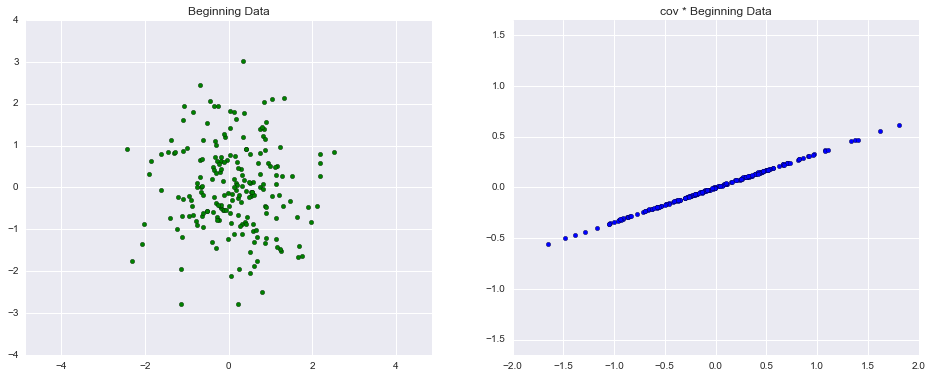

In [181]:
cov = np.cov(X, rowvar=False, bias=1)

hit_with_cov = cov.dot(transformed.T).T

# Let's plot both the beginning dataset and the "real" dataset side-by-side
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].scatter(beginning_data.T[:, 0], beginning_data.T[:, 1], c='g')
ax[0].axis('equal')
ax[0].set(title="Beginning Data")

ax[1].scatter(hit_with_cov[:, 0], hit_with_cov[:, 1])
ax[1].axis('equal')
ax[1].set(title="cov * Beginning Data");

Interesting!  It seems the effect is to map it all onto the first principal component

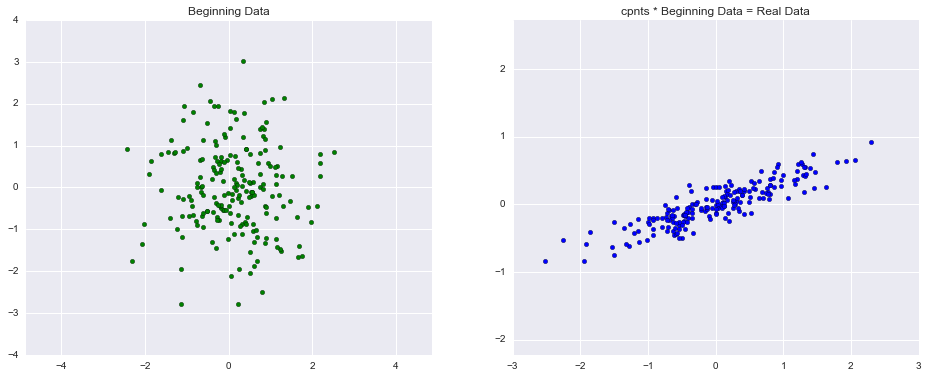

In [182]:
cpnts = pca.components_

hit_with_cpnts = cpnts.dot(transformed.T).T

# Let's plot both the beginning dataset and the "real" dataset side-by-side
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].scatter(beginning_data.T[:, 0], beginning_data.T[:, 1], c='g')
ax[0].axis('equal')
ax[0].set(title="Beginning Data")

ax[1].scatter(hit_with_cpnts[:, 0], hit_with_cpnts[:, 1])
ax[1].axis('equal')
ax[1].set(title="cpnts * Beginning Data = Real Data");

In [183]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

In [184]:
eigenvalues,eigenvectors

(array([ 0.75871884,  0.01838551]), array([[ 0.94446029, -0.32862557],
        [ 0.32862557,  0.94446029]]))

In [67]:
einv = np.linalg.inv(eigenvectors)

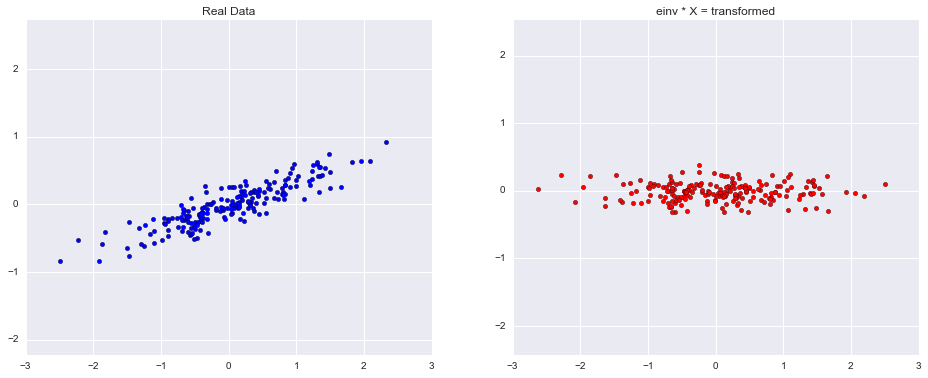

In [72]:
cpnts = pca.components_

hit_with_einv = einv.dot(X.T).T

# Let's plot both the beginning dataset and the "real" dataset side-by-side
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].scatter(X[:, 0], X[:, 1])
ax[0].axis('equal')
ax[0].set(title="Real Data");

ax[1].scatter(hit_with_einv[:, 0], hit_with_einv[:, 1], c='r')
ax[1].axis('equal')
ax[1].set(title="einv * X = transformed");

<div style="background-color: #EFDDFF; ">
<h4> Covariance vs. Correlation </h4>
</div>

In [77]:
resp = requests.get("http://people.ucsc.edu/~cdobkin/NHIS%202007%20data.csv").content

resp[:100]

b'HHX,FMX,FPX,SEX,BMI,SLEEP,educ,height,weight\r\n000016,01,02,1,33.36,8,16,74,260\r\n000020,01,01,1,26.54'

In [78]:
string_csv = resp.decode('utf-8')

df_full = pd.read_csv(io.StringIO(string_csv))
print(df_full.shape)
df_full.head()

(4785, 9)


,HHX,FMX,FPX,SEX,BMI,SLEEP,educ,height,weight
0,16,1,2,1,33.36,8,16,74,260
1,20,1,1,1,26.54,7,14,70,185
2,69,1,2,2,32.13,7,9,61,170
3,87,1,1,1,26.62,8,14,68,175
4,88,1,1,2,27.13,8,13,66,168


In [79]:
# Take only sex, height, and weight; also, downsample because it's too big
df = df_full[['SEX','height','weight']][::10]
df.columns = [s.lower() for s in df.columns]
print(df.shape)
df.head()

(479, 3)


,sex,height,weight
0,1,74,260
10,1,65,140
20,1,67,165
30,1,64,130
40,2,66,200


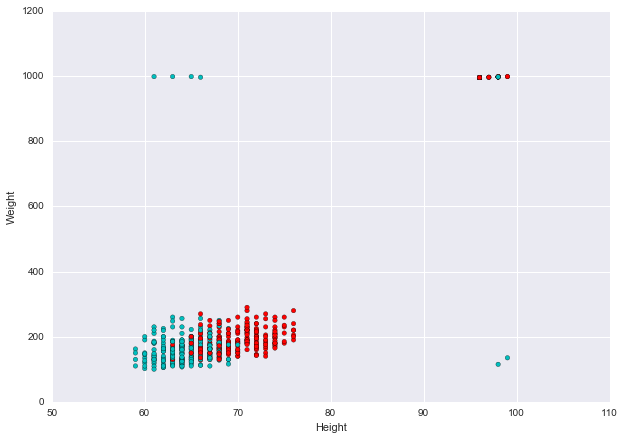

In [80]:
colors = {1:'r',2:'c'}

plt.figure(figsize=(10,7))
plt.scatter(df.height,df.weight, c=df.sex.map(colors))
plt.xlabel('Height')
plt.ylabel('Weight');

<div style="background-color: #EFDDFF; ">

<p> With infinite time, I would spend some trying to figure out why those larger values exist, but that's a bit out of scope for today, and I'm going to drop those from the dataset and move on:</p>
<div>

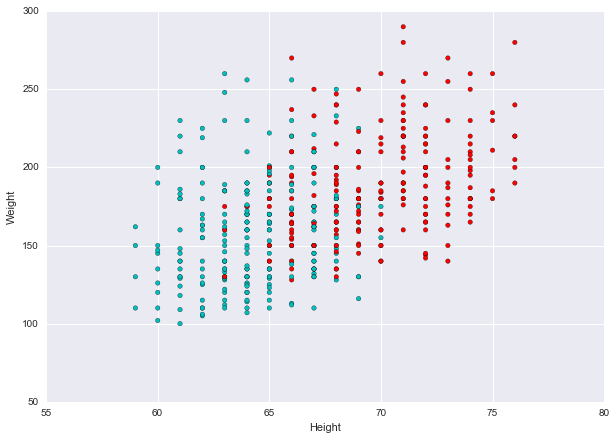

In [81]:
# Filter out strange values 
df = df[(df.height < 80) & (df.weight < 600)]

plt.figure(figsize=(10,7))
plt.scatter(df.height,df.weight, c=df.sex.map(colors))
plt.xlabel('Height')
plt.ylabel('Weight');

<div style="background-color: #EFDDFF; ">

<p> Let's split into men and women (and demonstrate subplots):</p>
<div>

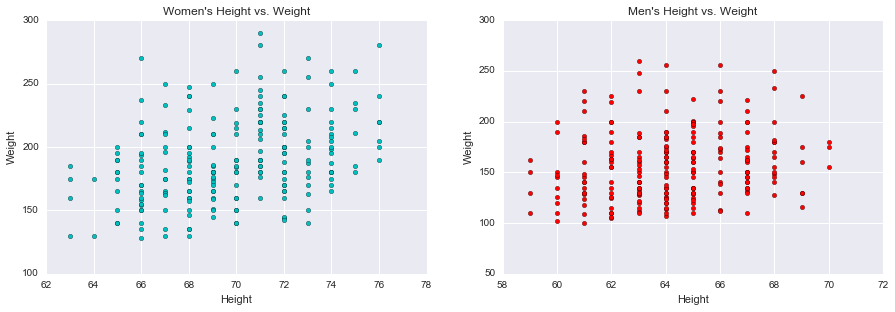

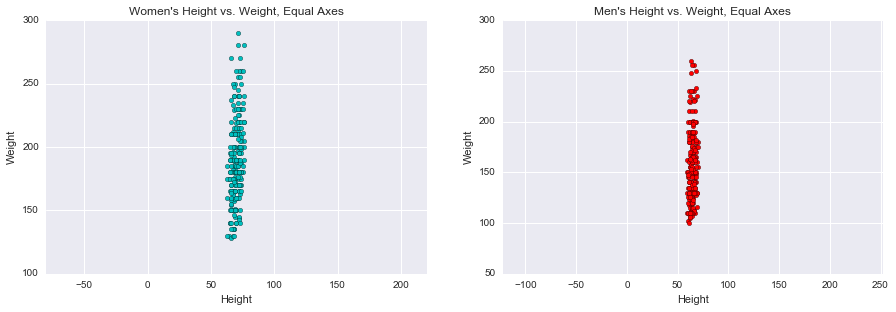

In [82]:
# Filter out strange values 
df = df[(df.height < 80) & (df.weight < 600)]

# Notice how gross all this code is!  We'll do better below.
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(df[df.sex == 1].height, df[df.sex == 1].weight, c='c')
plt.title("Women's Height vs. Weight")
ax1.set_xlabel('Height')
ax1.set_ylabel('Weight')

ax2 = fig.add_subplot(2,2,2)
ax2.scatter(df[df.sex == 2].height, df[df.sex == 2].weight, c='r')
plt.title("Men's Height vs. Weight")
ax2.set_xlabel('Height')
ax2.set_ylabel('Weight')

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,3)
ax1.scatter(df[df.sex == 1].height, df[df.sex == 1].weight, c='c')
plt.title("Women's Height vs. Weight, Equal Axes")
ax1.set_xlabel('Height')
ax1.set_ylabel('Weight')
plt.axis('equal')

ax2 = fig.add_subplot(2,2,4)
ax2.scatter(df[df.sex == 2].height, df[df.sex == 2].weight, c='r')
plt.title("Men's Height vs. Weight, Equal Axes")
ax2.set_xlabel('Height')
ax2.set_ylabel('Weight')
plt.axis('equal');

In [83]:
pca_women = PCA(n_components=2)
pca_women.fit(df[df.sex == 1][['height','weight']].values)

pca_men = PCA(n_components=2)
pca_men.fit(df[df.sex == 2][['height','weight']].values)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

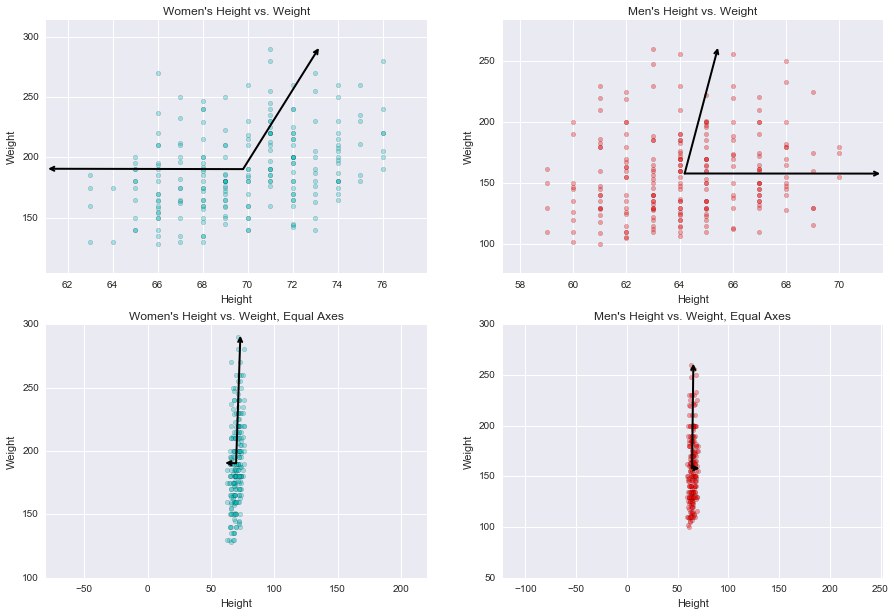

In [127]:
fig = plt.figure(figsize=(15,10))

changes_per_graph = zip(range(1,5),['']*2 + [', Equal Axes']*2,)

for i, title_str in changes_per_graph:
    ax = fig.add_subplot(2,2,i)
    
    # Collect all my choices
    gender_str, color, pca = [('M', 'r', pca_men), ('Wom', 'c', pca_women)][i % 2]
    
    # Make plots
    ax.scatter(df[df.sex == 2-(i % 2)].height, 
               df[df.sex == 2-(i % 2)].weight, 
               c=color, 
               alpha=0.35)
    plt.title("{}en's Height vs. Weight{}".format(gender_str, title_str))
    ax.set_xlabel('Height')
    ax.set_ylabel('Weight')    
    if i > 2:
        plt.axis('equal')
    else:
        ## The arrows won't show on these unless I zoom out slightly
        ax.margins(0.15)
        
    # Recall Jake's draw_vector function!
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)
        draw_vector(pca.mean_, pca.mean_ + v);

<div style="background-color: #EFDDFF; ">

<p> That being said, we only really need one of these two datasets for now.  Let's go with women.</p>
</div>

In [87]:
women = df[df.sex == 1][["height", "weight"]]

np.cov(women, rowvar=False, bias=1)

array([[    9.61260191,    37.39477909],
       [   37.39477909,  1124.08423511]])

<div style="background-color: #EFDDFF; ">
Notice, of course, that the items below the diagonal of the matrix have appear above the diagonal as well, because the definition of covariance is symmetric.  Also notice that the numbers change drastically.  This suggests to me that one column has a lot more variance than the other, and that may or may not be helpful.  For example, let's check out the range of the two vectors and try to guess their units, given that they are the height and weight of adult women.
</div>

In [88]:
women.describe()

,height,weight
count,219.000000,219.000000
mean,69.799087,190.283105
std,3.107523,33.604175
min,63.000000,128.000000
25%,67.500000,165.000000
50%,70.000000,185.000000
75%,72.000000,210.500000
max,76.000000,290.000000


<div style="background-color: #EFDDFF; ">
<p>This suggests height is in inches (the average American woman is 64 inches tall) and weight is probably in pounds, though that seems a bit higher than the average of 166lbs.  It's probably because this is medical data, and the people who would sign up for a medical study is not a uniformly random subset of the population.</p>

<p>But that's not the point.  The point is that the variance of weight is WAY higher than the variance of height.  Let's change that though, by changing the units to millimeters and stone (British unit, 14lbs per stone).</p> </div>

In [89]:
women['height_in_mm'] = women.height * 25.4
women['weight_in_stone'] = women.weight / 14

<div style="background-color: #EFDDFF; ">
This makes things seem a bit strange.  Let's plot the same data, side-by-side, with different units.
</div>

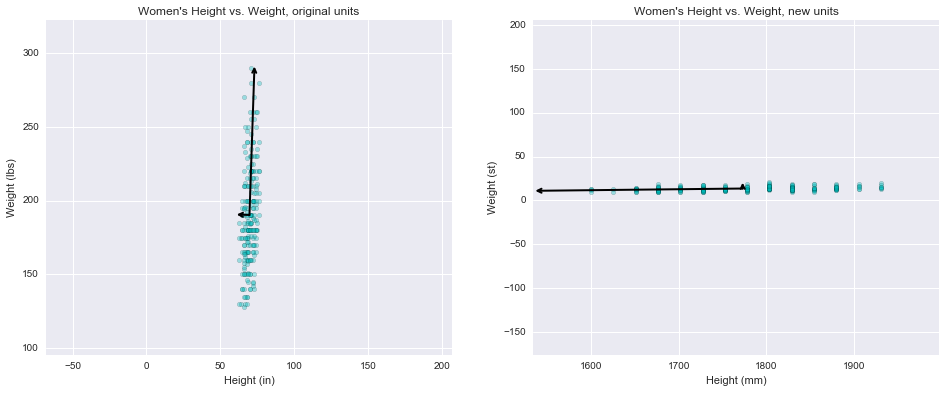

In [143]:
# Fit a new PCA with the new dimensions:
pca_women_new_units = PCA(n_components=2)
pca_women_new_units.fit(women[['height_in_mm','weight_in_stone']].values)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i in range(2):
    ax = axes[i]
    pca = [pca_women, pca_women_new_units][i]
    x,y = [('height', 'weight'),('height_in_mm','weight_in_stone')][i]
    label_x, label_y = [('Height (in)', 'Weight (lbs)'), ('Height (mm)', 'Weight (st)')][i]
    title_text = ["original units", "new units"][i]              
        
    # Make plots
    ax.scatter(women[x], women[y], c="c", alpha=0.35)
    ax.set(title="Women's Height vs. Weight, {}".format(title_text),
           xlabel=label_x,
           ylabel=label_y)
    ax.axis('equal')
    ax.margins(0.2)  ## The arrows won't show on these unless I zoom out slightly
        
    # Recall Jake's draw_vector function!
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)
        draw_vector(pca.mean_, pca.mean_ + v, ax=ax);

<div style="background-color: #EFDDFF; ">
<p>If we first divide by the standard deviation ($\sqrt{variance}$) of all the columns, then we will not have this issue any more.</p> </div>

In [142]:
women.head()

,height,weight,height_in_mm,weight_in_stone,height_normalized,weight_normalized,height_in_mm_normalized,weight_in_stone_normalized
0,74,260,1879.6,18.571429,7.663076,0.230243,0.301696,3.223405
10,65,140,1651.0,10.000000,6.731080,0.123977,0.265003,1.735680
20,67,165,1701.8,11.785714,6.938191,0.146116,0.273157,2.045623
30,64,130,1625.6,9.285714,6.627525,0.115122,0.260926,1.611703
50,68,175,1727.2,12.500000,7.041746,0.154971,0.277234,2.169600


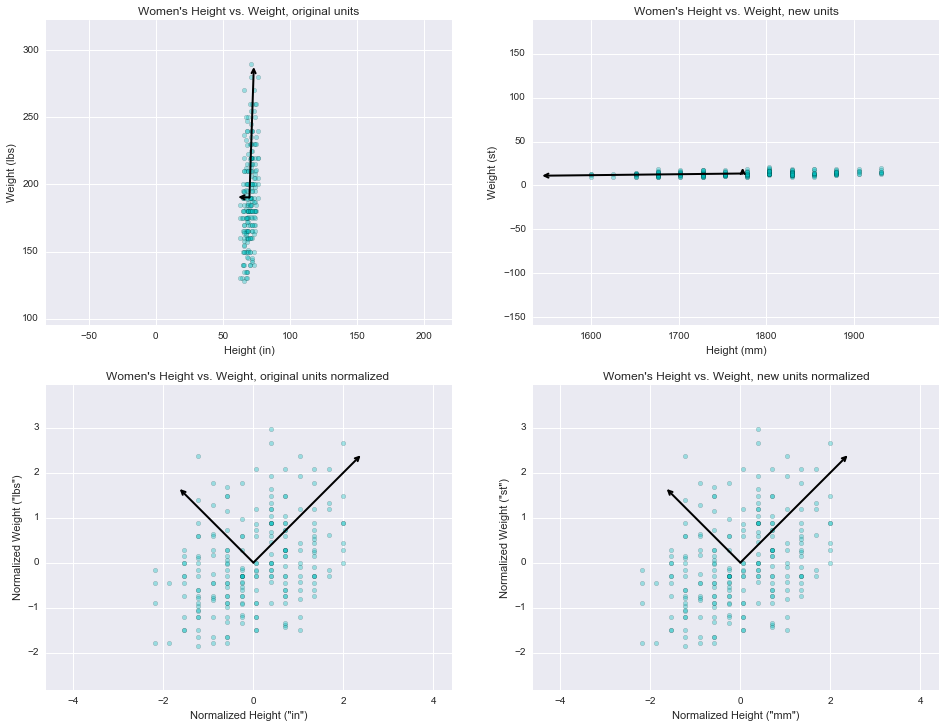

In [151]:
for column in women.columns:
    women[column + "_normalized"] = (women[column] - women[column].mean()) / women[column].std()

# Fit two new PCAs with the newly scaled columns:
pca_women_old_units_normed = PCA(n_components=2)
pca_women_old_units_normed.fit(women[['height_normalized','weight_normalized']].values)

pca_women_new_units_normed = PCA(n_components=2)
pca_women_new_units_normed.fit(women[['height_in_mm_normalized','weight_in_stone_normalized']].values)

# Data to make the plot loop more readable
PCAs = [pca_women, pca_women_new_units, pca_women_old_units_normed, pca_women_new_units_normed]
columns = [('height', 'weight'),
           ('height_in_mm','weight_in_stone'),
           ('height_normalized', 'weight_normalized'),
           ('height_in_mm_normalized','weight_in_stone_normalized')]
labels = [('Height (in)', 'Weight (lbs)'), 
          ('Height (mm)', 'Weight (st)'),
          ('Normalized Height ("in")', 'Normalized Weight ("lbs")'), 
          ('Normalized Height ("mm")', 'Normalized Weight ("st")')]
title_texts = ["original units", 
               "new units", 
               "original units normalized ", 
               "new units normalized"]


fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for i in range(4):
    ax = axes[i//2,i%2]
    pca = PCAs[i]
    x,y = columns[i]
    label_x, label_y = labels[i]
    title_text = title_texts[i]              
        
    # Make plots
    ax.scatter(women[x], women[y], c="c", alpha=0.35)
    ax.set(title="Women's Height vs. Weight, {}".format(title_text),
           xlabel=label_x,
           ylabel=label_y)
    ax.axis('equal')
            
    ax.margins(0.2)   ## The arrows won't show on these unless I zoom out slightly
        
    # Recall Jake's draw_vector function!
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 2.9 * np.sqrt(length) 
        draw_vector(pca.mean_, pca.mean_ + v, ax=ax);

One final, hastily written comment: this is the idea behind the _correlation_ as opposed to the _covariance_, it's standardized to only be with $[-1,1]$, so that the number itself has an interpretation.

### Further Reading
* http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/
* https://www.youtube.com/watch?v=PFDu9oVAE-g
* http://math.stackexchange.com/questions/23596/why-is-the-eigenvector-of-a-covariance-matrix-equal-to-a-principal-component
